In [1]:
import numpy as np
from lineData import data,x,y,z
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from pyowl import OwlRegressor
from mpl_toolkits.mplot3d import Axes3D
from laplace import get_laplace, knn_laplace,extend_knn,cordinate, distance
from kMeans import kMeans, min_k_index, max_k_index
from LocalL1 import locaL1, localL1_2
import copy

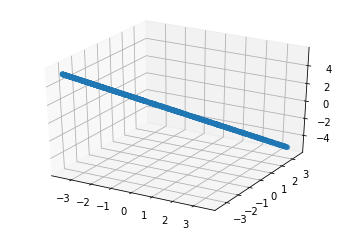

In [2]:
ax=plt.subplot(111,projection='3d')
ax.scatter(x,y,z)

In [3]:
n_sample=len(data[0])
n_feature=len(data)

In [85]:
alpha=0.00001
K=200
k1=100
k2=800
epsilon=0.5

In [86]:
indexs=np.random.choice(range(n_feature),K)
B=np.zeros((n_feature,n_feature))

In [87]:
B=localL1_2(data,indexs,B,alpha,epsilon,k2)
B=np.abs(B)

In [88]:
nonzero=[]
for index in range(1000):
    nonzero.append(np.count_nonzero(B[:,index]))
nonzero_idx=[]
for i in range(1000):
    if nonzero[i]!=0:
        nonzero_idx.append(i)
max(nonzero)
#nonzero

10

In [95]:
index=nonzero_idx[22]
print(index)
print(nonzero[index])
if nonzero[index]<250:
    n=nonzero[index]
else:
    n=10
idx=[]
for i in range(1,n+1):
    idx.append(max_k_index(B[:,index],i))
print(idx)

136
5
[97, 106, 227, 304, 870]


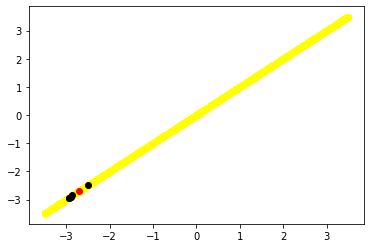

In [96]:
ax=plt.subplot(111)
ax.scatter(x,y,color='yellow')
ax.scatter(x[index],y[index],color='red')
for i in range(n):
    ax.scatter(x[idx[i]],y[idx[i]],color='black')